<a href="https://colab.research.google.com/github/RaminTK/PATH/blob/main/Mar6_PATH_Disruption_Scenarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
!pip install wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# from collections import Counter
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import nltk
import pandas as pd
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')

Mounted at /content/drive


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Read the dataset

In [ ]:
a = pd.read_csv('drive/MyDrive/path/Mar01-Aug31.csv')
b = pd.read_csv('drive/MyDrive/path/Sep01-Feb28.csv')

In [ ]:
a

,Notification ID,Sent On,Message Title,Message Body,END
0,9.465440e+14,"Mar 03, 2023 06:05:00 CST",PATHAlert - 33 St Elevator Back In Service,33 St elevator is back in service after an ear...,END
1,9.465780e+14,"Mar 03, 2023 04:38:42 CST",PATHAlert - 33 St Elevator Temporarily Out Of ...,PATH 33 St elevator is temporarily out of serv...,END
2,9.530380e+14,"Mar 03, 2023 14:28:37 CST",Newark-World Trade Center Service Update - Res...,Trains from Newark & Harrison are once again d...,END
3,9.516980e+14,"Mar 03, 2023 16:31:57 CST",PATHAlert - PAPD Notification,"JSQ-33, HOB-WTC delayed. PAPD responding to a ...",END
4,9.426950e+14,"Mar 02, 2023 18:31:12 CST",Trespasser,"NWK-WTC, JSQ-33 delayed. Crew reported a tresp...",END
...,...,...,...,...,...
2785,1.127380e+15,"Aug 30, 2023 06:10:04 CDT",PATHAlert: Unattended Package,07:10 AM: JSQ-33 delayed. Crew reported an una...,END
2786,1.127650e+15,"Aug 30, 2023 06:26:20 CDT",PATHAlert Update: Unattended Package,07:26 AM: JSQ-33 delayed. PAPD en route to inv...,END
2787,1.127410e+15,"Aug 30, 2023 21:00:00 CDT",PATHAlert: 9 St & 23 St Overnight Closures,9 St and 23 St stations closed nightly from ap...,END
2788,1.127650e+15,"Aug 30, 2023 03:22:24 CDT",Newark-World Trade Center Service Update - Res...,Trains from Newark & Harrison are once again d...,END


In [ ]:
b

,Notification ID,Sent On,Message Title,Message Body,END
0,3.248100e+15,"Sep 09, 2022 12:05:21 CDT",PATHAlert - Elevators,"At JSQ, the Kiss&Ride elevator from street to ...",END
1,3.248100e+15,"Sep 09, 2022 11:48:04 CDT",PATHAlert - Elevators,"At JSQ, the Kiss&Ride elevator from street to ...",END
2,3.225970e+15,"Sep 08, 2022 11:02:39 CDT",PATHAlert - Car Cleaning,JSQ-33 delayed. Crew en route to clean an unsa...,END
3,3.248100e+15,"Sep 09, 2022 05:58:13 CDT",PATHAlert Final Update - Mechanical Problem,JSQ-33 resuming normal service. Crew resolved ...,END
4,3.191470e+15,"Sep 01, 2022 06:35:03 CDT",PATHAlert - Elevators,"At HAR, the Newark-bound station elevator is b...",END
...,...,...,...,...,...
2074,9.366140e+14,"Feb 27, 2023 09:34:21 CST",PATHAlert Update - Medical Emergency,"NWK-WTC, JSQ-33 delayed. Patron in need of med...",END
2075,9.367510e+14,"Feb 26, 2023 21:00:02 CST",9 St Station and 23 St Station Overnight Advisory,9 St and 23 St stations closed nightly from ap...,END
2076,9.364760e+14,"Feb 24, 2023 19:59:52 CST",PAPD Notification,HOB-33 delayed. PAPD responding to a reported ...,END
2077,9.367170e+14,"Feb 27, 2023 14:40:21 CST",PATHAlert Update - PAPD Notification,"PATHAlert Update: NWK-WTC, HOB-WTC delayed. PA...",END


In [ ]:
data = pd.concat([a, b], axis=0).reset_index()
data

,index,Notification ID,Sent On,Message Title,Message Body,END
0,0,9.465440e+14,"Mar 03, 2023 06:05:00 CST",PATHAlert - 33 St Elevator Back In Service,33 St elevator is back in service after an ear...,END
1,1,9.465780e+14,"Mar 03, 2023 04:38:42 CST",PATHAlert - 33 St Elevator Temporarily Out Of ...,PATH 33 St elevator is temporarily out of serv...,END
2,2,9.530380e+14,"Mar 03, 2023 14:28:37 CST",Newark-World Trade Center Service Update - Res...,Trains from Newark & Harrison are once again d...,END
3,3,9.516980e+14,"Mar 03, 2023 16:31:57 CST",PATHAlert - PAPD Notification,"JSQ-33, HOB-WTC delayed. PAPD responding to a ...",END
4,4,9.426950e+14,"Mar 02, 2023 18:31:12 CST",Trespasser,"NWK-WTC, JSQ-33 delayed. Crew reported a tresp...",END
...,...,...,...,...,...,...
4864,2074,9.366140e+14,"Feb 27, 2023 09:34:21 CST",PATHAlert Update - Medical Emergency,"NWK-WTC, JSQ-33 delayed. Patron in need of med...",END
4865,2075,9.367510e+14,"Feb 26, 2023 21:00:02 CST",9 St Station and 23 St Station Overnight Advisory,9 St and 23 St stations closed nightly from ap...,END
4866,2076,9.364760e+14,"Feb 24, 2023 19:59:52 CST",PAPD Notification,HOB-33 delayed. PAPD responding to a reported ...,END
4867,2077,9.367170e+14,"Feb 27, 2023 14:40:21 CST",PATHAlert Update - PAPD Notification,"PATHAlert Update: NWK-WTC, HOB-WTC delayed. PA...",END


# Data Cleaning

In [ ]:
# data = data.drop('Notification ID', axis=1)
# data = data.drop('Sent On', axis=1)
# data = data.drop('Message Body', axis=1)
# data = data.drop('END', axis=1)
# data = data.drop('index', axis=1)

# data.fillna(0, inplace=True)

# data = data.rename(columns={'Message Title': 'Content'})


In [ ]:
data = data.drop('Notification ID', axis=1)
data = data.drop('Sent On', axis=1)
data = data.drop('Message Title', axis=1)
data = data.drop('END', axis=1)
data = data.drop('index', axis=1)

data.fillna(0, inplace=True)

data = data.rename(columns={'Message Body': 'Content'})


Removing: AM PM and Hours stopwords

In [ ]:
def preprocess_text(text):
    if not isinstance(text, str):
        text = str(text)
    text =re.sub(r'\d{1,2}:\d{2}\s*[APMapm]{2}', '', text, flags=re.I)
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)
data['Content'] = data['Content'].apply(preprocess_text)

Removing anything but words and numbers

In [ ]:
data

,Content
0,33 St elevator back service earlier outage. We...
1,PATH 33 St elevator temporarily service. To NJ...
2,Trains Newark & Harrison departing normal trac...
3,"JSQ-33, HOB-WTC delayed. PAPD responding repor..."
4,"NWK-WTC, JSQ-33 delayed. Crew reported trespas..."
...,...
4864,"NWK-WTC, JSQ-33 delayed. Patron need medical h..."
4865,9 St 23 St stations closed nightly approximate...
4866,HOB-33 delayed. PAPD responding reported incid...
4867,"PATHAlert Update: NWK-WTC, HOB-WTC delayed. PA..."


In [ ]:
def preprocess_text(text):

    if not isinstance(text, str):
        text = str(text)
    text =re.sub(r'\d{1,2}:\d{2}\s*[APMapm]{2}', '', text, flags=re.I)
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    text = ' '.join(tokens)

    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = text.lower()
    text = re.sub(r'\d{1,2}:\d{2}\s*[APMapm]{2}', '', text, flags=re.I)
    # text = text.str.replace(' +', ' ')
    return text

cleantext = data['Content'].apply(preprocess_text)
cleantext = cleantext.str.replace(' +', ' ')

cleantext

<ipython-input-10-1c3b04d5bdf6>:19: FutureWarning: The default value of regex will change from True to False in a future version.
  cleantext = cleantext.str.replace(' +', ' ')


0        st elevator back service earlier outage we ap...
1       path st elevator temporarily service to nj nyc...
2       trains newark harrison departing normal tracks...
3       jsq hob wtc delayed papd responding reported i...
4       nwk wtc jsq delayed crew reported trespasser t...
                              ...                        
4864    nwk wtc jsq delayed patron need medical help r...
4865     st st stations closed nightly approximately a...
4866    hob delayed papd responding reported incident ...
4867    pathalert update nwk wtc hob wtc delayed papd ...
4868    pathalert hob wtc delayed papd responding repo...
Name: Content, Length: 4869, dtype: object

In [ ]:
def remove_context(text):
    text = text.replace("jsq 33 ","")
    text = text.replace("hob 33 ","")
    text = text.replace("nwk wtc ","")
    text = text.replace("9 st 23 ","")
    text = text.replace("chrs st  23 ","")
    text = text.replace("hob wtc ","")
    text = text.replace("nwk jsq ","")
    text = text.replace("via","")
    text = text.replace("33 st ","")
    text = text.replace("hob ","")
    text = text.replace("to ","")
    text = text.replace("from ","")
    text = text.replace("newark ","")
    text = text.replace("st ","")
    text = text.replace("at ","")
    text = text.replace("expl ","")
    text = text.replace("nwpt ","")
    text = text.replace("jsq ","")
    text = text.replace("grv ","")
    text = text.replace("har ","")
    text = text.replace("at ","")
    text = text.replace("harrison ","")
    text = text.replace("christopher street ","")
    text = text.replace("s ","")
    text = text.replace("hoboken ","")
    text = text.replace("apologize ","")
    text = text.replace("nwk ","")
    text = text.replace("njt ","")
    text = text.replace("pathalert ","")



    return text
cleantext = cleantext.apply(remove_context)
cleantext = cleantext.str.replace(' +', ' ')
cleantext = cleantext.str.strip()
cleantext


<ipython-input-11-f1a52fec5741>:36: FutureWarning: The default value of regex will change from True to False in a future version.
  cleantext = cleantext.str.replace(' +', ' ')


0       elevator back service earlier outage we inconv...
1       path elevator temporarily service nj nyc subwa...
2       traindeparting normal trackearlier service adj...
3       delayed papd responding reported incident we i...
4       delayed crew reported trespasser track area we...
                              ...                        
4864    delayed patron need medical help removed train...
4865    stationclosed nightly approximately am followi...
4866    delayed papd responding reported incident rd w...
4867    update delayed papd investigating incident rai...
4868    delayed papd responding reported incident wtc ...
Name: Content, Length: 4869, dtype: object

In [ ]:
cleantext = cleantext.astype(str)

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(cleantext)
X

<4869x1036 sparse matrix of type '<class 'numpy.int64'>'
	with 56075 stored elements in Compressed Sparse Row format>

In [ ]:
kmeans = KMeans(n_clusters=4)  # You can adjust the number of clusters as per your needs
kmeans.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
clusters = kmeans.predict(X)

for cluster_id in range(kmeans.n_clusters):
    cluster_tweets = cleantext[clusters == cluster_id]
    print(f"Cluster {cluster_id}:")
    print(cluster_tweets)
    print()


Cluster 0:
376     delayed papd responding reported incident an u...
385     delayed essential track maintenance continuean...
386     delayed essential track maintenance continuean...
387     delayed crew continueperform essential track m...
389     delayed papd responding reported incident rd a...
                              ...                        
2775    delaycontinue assessing train network communic...
2776    delaycontinue assessing train network communic...
2777    delayed train experiencing network communicati...
2780    delaycontinue papd en route investigate unatte...
2781    delayed crew reported unattended package an up...
Name: Content, Length: 809, dtype: object

Cluster 1:
15      service operateh platform service operatebound...
50      service operateh platform service operatebound...
52      service operateh platform service operatebound...
111     service operateb c platformservice operatewtc ...
253     service operateb c platformservice operatewtc ...
       

In [ ]:
# df = cleantext[clusters == 2]

In [ ]:
# pip install pandas scikit-learn gensim


In [ ]:
# df = cleantext[clusters == 1]
# df = df.str.replace('sample', '', regex=False)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Assume your series is named "tweets_series"
tweets_series = cleantext[clusters == 3]
# Tokenization
vectorizer = CountVectorizer(stop_words='english', min_df=10, max_df=0.9, token_pattern=r'\w+')
data_vectorized = vectorizer.fit_transform(tweets_series)

# Create a vocabulary
vocab = vectorizer.get_feature_names_out()

# Convert to gensim corpus
corpus = gensim.matutils.Sparse2Corpus(data_vectorized, documents_columns=False)

# Create a word:id dictionary
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())


In [ ]:
# Set the number of topics you expect
num_topics = 15

# Create and train the LDA model
lda = LdaModel(corpus, num_topics=num_topics, id2word=id2word, passes=15)

# Print topics and words associated
topics = lda.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.201*"papd" + 0.200*"incident" + 0.180*"continueinvestigate" + 0.174*"grove" + 0.129*"delaycontinue"')
(1, '0.220*"rd" + 0.136*"train" + 0.119*"power" + 0.100*"repair" + 0.096*"delayed"')
(2, '0.171*"train" + 0.166*"delayed" + 0.155*"network" + 0.155*"communication" + 0.154*"experiencing"')
(3, '0.138*"river" + 0.134*"bridge" + 0.131*"draw" + 0.116*"hack" + 0.099*"lock"')
(4, '0.165*"delayed" + 0.156*"reported" + 0.093*"crew" + 0.083*"papd" + 0.074*"problemtrain"')
(5, '0.107*"work" + 0.100*"resuming" + 0.092*"signal" + 0.081*"problem" + 0.072*"delaycontinue"')
(6, '0.149*"path" + 0.135*"croshonoring" + 0.082*"rail" + 0.070*"sec" + 0.056*"suspended"')
(7, '0.181*"train" + 0.165*"issue" + 0.150*"removed" + 0.107*"service" + 0.098*"delaycontinue"')
(8, '0.381*"delaycontinue" + 0.133*"papd" + 0.121*"investigating" + 0.071*"wtc" + 0.054*"incident"')
(9, '0.226*"delayed" + 0.127*"reported" + 0.093*"signal" + 0.083*"problem" + 0.071*"crew"')
(10, '0.159*"track" + 0.150*"condition" + 0.

In [ ]:
# def get_topic_weights(lda, corpus, num_topics):
#     all_topics = lda.get_document_topics(corpus, per_word_topics=True)
#     weights_df = pd.DataFrame([{t:0 for t in range(num_topics)}])

#     for doc_topics, word_topics, phi_values in all_topics:
#         temp = {t:0 for t in range(num_topics)}
#         for topic, prob in doc_topics:
#             temp[topic] = prob
#         weights_df = weights_df.append(pd.DataFrame([temp]), ignore_index=True)

#     return weights_df

# topic_weights = get_topic_weights(lda, corpus, num_topics)


In [ ]:
# topic_weights

In [ ]:
# pip install bertopic


In [ ]:
from bertopic import BERTopic

tweets = tweets_series

topic_model = BERTopic(verbose=True)

topics, probs = topic_model.fit_transform(tweets)

topic_freq = topic_model.get_topic_info()
print(topic_freq)

for topic in topic_freq['Topic'][:5]:  # Display the top 5 topics as an example
    if topic != -1:  # -1 refers to outliers and can be ignored
        print(topic_model.get_topic(topic))


Batches:   0%|          | 0/26 [00:00<?, ?it/s]

2023-10-03 14:46:51,616 - BERTopic - Transformed documents to Embeddings
2023-10-03 14:46:54,837 - BERTopic - Reduced dimensionality
2023-10-03 14:46:54,858 - BERTopic - Clustered reduced embeddings


    Topic  Count                                            Name  \
0      -1     39      -1_unattended_package_investigated_problem   
1       0     76                    0_croshonoring_path_rail_sec   
2       1     61         1_track_essential_condition_maintenance   
3       2     41                   2_delaycontinue_an_min_issued   
4       3     38         3_problemtrain_mechanical_reported_crew   
5       4     38                        4_bridge_river_draw_hack   
6       5     33  5_experiencing_probleman_network_communication   
7       6     31                6_delayed_minwe_inconvenience_an   
8       7     29       7_assessing_network_communication_problem   
9       8     27             8_responding_incident_papd_reported   
10      9     27              9_resolve_working_mechanical_train   
11     10     25      10_complaint_passenger_disruptive_reported   
12     11     24             11_dispatch_signal_reported_problem   
13     12     23                    12_we_signal

In [ ]:
text = ' '.join(x)

In [ ]:
text = text.replace("apologize ","")
text = text.replace("inconvenience ","")
text = text.replace("wtc ","")
text = text.replace("delayed ","")
text = text.replace("continue ","")
text = text.replace("delay ","")
text = text.replace("delays ","")
# text = text.replace("rd ","")
# text = text.replace("th ","")
text = text.replace("nwk ","")
text = text.replace("travel time ","")
# text = text.replace("tp ","")
# text = text.replace("m ","")
text = text.replace("working resolve ","")
text = text.replace("update ","")
text = text.replace("min ","")
text = text.replace("mins ","")
# text = text.replace("rb ","")
# text = text.replace("hi ","")
# text = text.replace("njt ","")
text = text.replace("please ","")
text = text.replace("allow ","")
text = text.replace("notification ","")
text = text.replace("notifications ","")
text = text.replace("reported ","")
text = text.replace("update ","")
text = text.replace("updates ","")
text = text.replace("recieve ","")
# text = text.replace("s ","")
text = text.replace("thank ","")
# text = text.replace("nd ","")
# text = text.replace("p ","")
# text = text.replace("w ","")
text = text.replace("crew ","")
text = text.replace("recieve ","")
text = text.replace("issue ","")
text = text.replace("nyc hoboken ","")
text = text.replace("jersey city ","")

text

'elevator street fare zone back service earlier outage we may caused we regret elevators street mezz back service earlier outage we may caused we regret lift elevator mezz platform back service earlier outage we may caused elevator back service earlier outage we may caused elevator mezz platform b back service earlier outage we may caused elevator mezz platform back service earlier outage we may caused elevator mezz platform back service earlier outage we may caused we regret kiss ride elevator street concourse back service earlier outage we may caused lift elevator mezz platform back service earlier outage we may caused we regret kiss ride elevator street concourse back service earlier outage we may caused concourse elevator connecting platform trks back service earlier outage we may caused bound station elevator back service earlier outage we may caused elevator mezz platform a back service earlier outage we may caused we regret elevator mezz platform a service we may caused concours

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


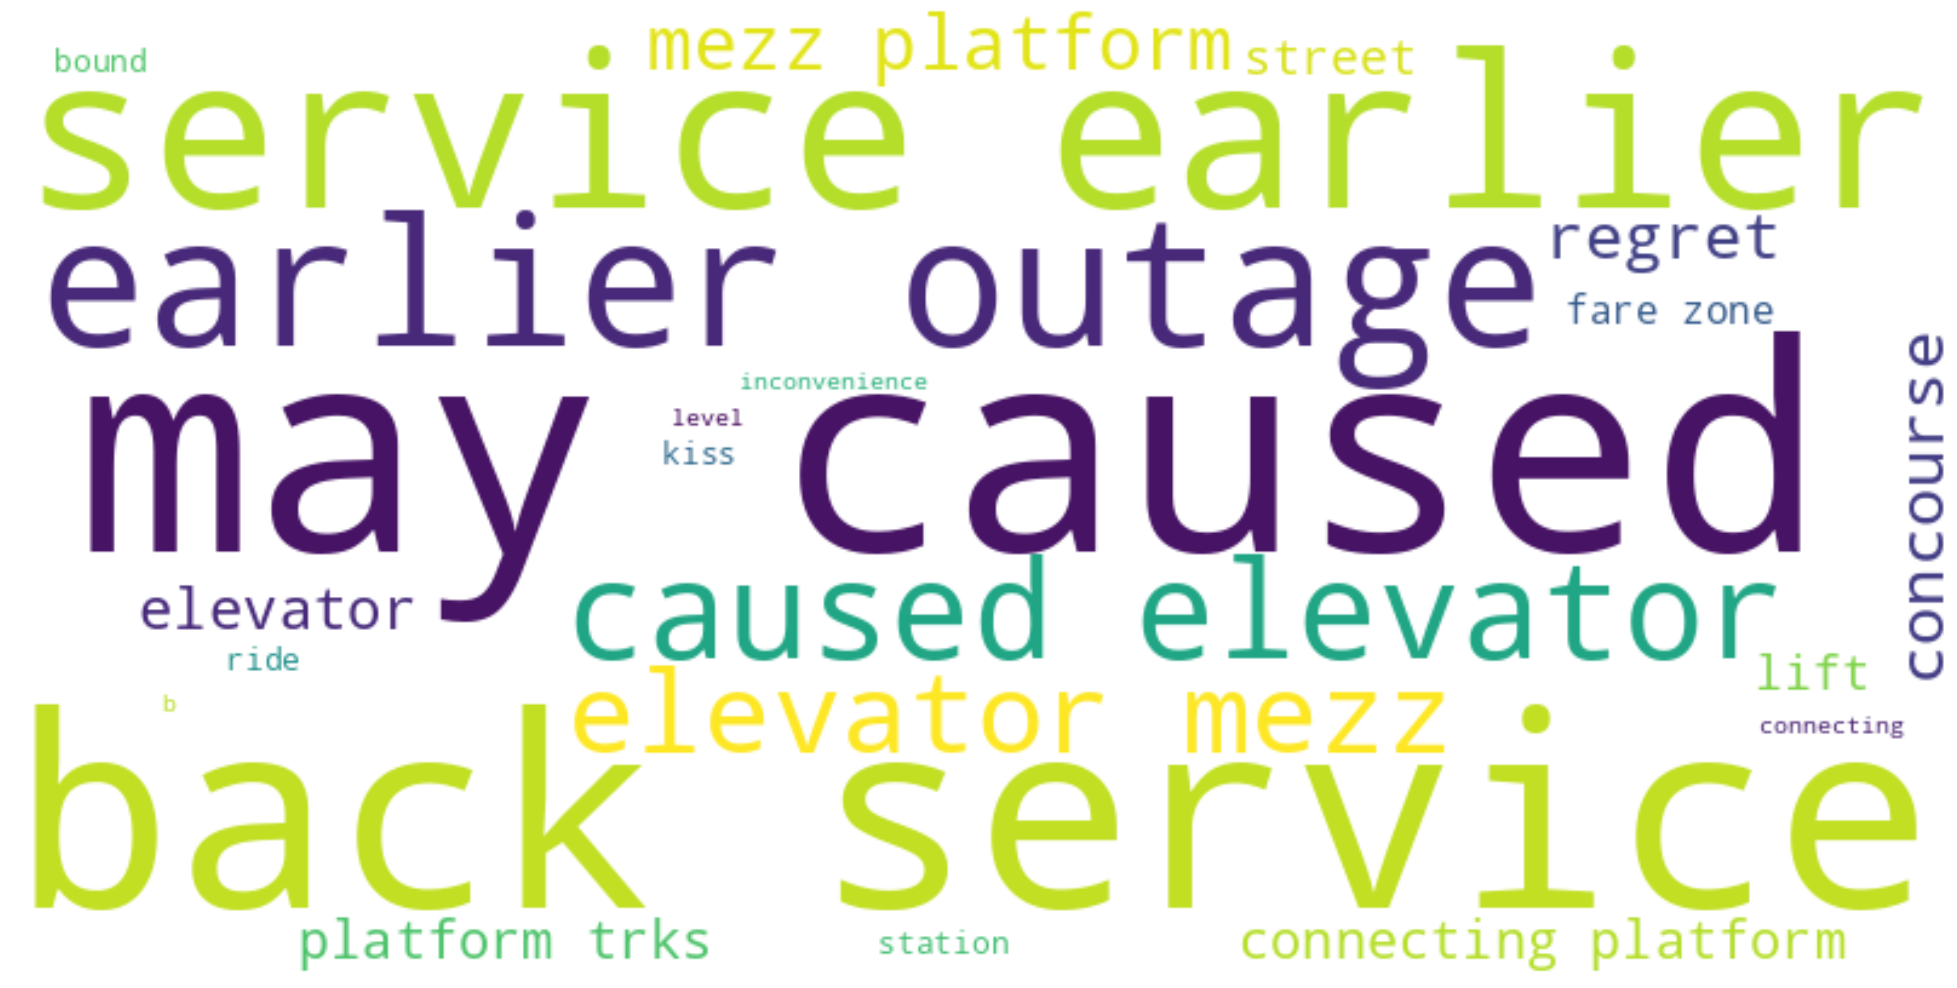

In [ ]:
plt.figure(figsize=(25, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis labels
plt.show()


In [ ]:
word_frequencies = wordcloud.process_text(text)


In [ ]:
# Convert word frequencies to a DataFrame for easier manipulation
word_df = pd.DataFrame.from_dict(word_frequencies, orient='index', columns=['frequency'])

# Sort words by frequency (optional)
word_df = word_df.sort_values(by='frequency', ascending=False)

# Display the DataFrame with words and frequencies
print(word_df)

                     frequency
may caused                  36
back service                33
earlier outage              33
service earlier             33
caused elevator             17
mezz platform               12
elevator mezz               12
regret                       9
concourse                    9
elevator                     7
connecting platform          6
platform trks                6
street                       5
lift                         5
fare zone                    3
station                      2
bound                        2
ride                         2
kiss                         2
inconvenience                1
connecting                   1
b                            1
level                        1


In [ ]:
word_df

,frequency
next,13
front exit,12
advance traveling,12
maintenance,12
rear station,12
...,...
verna,1
thiconvenience,1
link,1
frequency,1
